### Import Library

In [1]:
import numpy as np # untuk linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns # Data Visualization library
import matplotlib.pyplot as plt
import time # Untuk time recording

### Import Dataset

In [2]:
df = pd.read_csv("Fraud Credit Detection/fraudTrain.csv")

In [3]:
df.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


### Explore Dataset

In [4]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [6]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Unnamed: 0: [      0       1       2 ... 1296672 1296673 1296674]
trans_date_trans_time: ['2019-01-01 00:00:18' '2019-01-01 00:00:44' '2019-01-01 00:00:51' ...
 '2020-06-21 12:12:32' '2020-06-21 12:13:36' '2020-06-21 12:13:37']
cc_num: [   2703186189652095        630423337322      38859492057661
    3534093764340240     375534208663984    4767265376804500
      30074693890476    6011360759745864    4922710831011201
    2720830304681674       4642894980163     377234009633447
     180042946491150    5559857416065248    3514865930894695
    6011999606625827    6011860238257910    3565423334076143
    2348245054386329 4956828990005111019 4469777115158234880
    2305336922781618     180048185037117        630441765090
 4428780983793657331     343464013864032     374930071163758
    4334230547694630 4225990116481262579    4260059589824237
     180094608895855 4599735407877245080        630412733309
    2712209726293386     374125201044065     349612764943496
    3598215285024754     2131417

merchant: ['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckridge' 'fraud_Kutch, Hermiston and Farrell'
 'fraud_Keeling-Crist' 'fraud_Stroman, Hudson and Erdman'
 'fraud_Rowe-Vandervort' 'fraud_Corwin-Collins' 'fraud_Herzog Ltd'
 'fraud_Schoen, Kuphal and Nitzsche' 'fraud_Rutherford-Mertz'
 'fraud_Kerluke-Abshire' 'fraud_Lockman Ltd' 'fraud_Kiehn Inc'
 'fraud_Beier-Hyatt' 'fraud_Schmidt and Sons' 'fraud_Lebsack and Sons'
 'fraud_Mayert Group' 'fraud_Konopelski, Schneider and Hartmann'
 'fraud_Schultz, Simonis and Little' 'fraud_Bauch-Raynor'
 'fraud_Harris Inc' 'fraud_Kling-Grant' 'fraud_Pacocha-Bauch'
 'fraud_Lesch Ltd' 'fraud_Kunde-Sanford' "fraud_Deckow-O'Conner"
 'fraud_Bruen-Yost' 'fraud_Kunze Inc' 'fraud_Nitzsche, Kessler and Wolff'
 'fraud_Kihn, Abernathy and Douglas' 'fraud_Torphy-Goyette'
 'fraud_Balistreri-Nader' 'fraud_Bahringer, Schoen and Corkery'
 'fraud_Hudson-Ratke' 'fraud_Heidenreich PLC' 'fraud_Halvorson Group'
 'fraud_Harber Inc' 'fraud

amt: [  4.97 107.23 220.11 ... 754.81 374.71 255.52]
first: ['Jennifer' 'Stephanie' 'Edward' 'Jeremy' 'Tyler' 'Kelsey' 'Steven'
 'Heather' 'Melissa' 'Eddie' 'Theresa' 'Charles' 'Jack' 'Christopher'
 'Ronald' 'Lisa' 'Nathan' 'Justin' 'Kenneth' 'Gregory' 'Jeffrey' 'Mary'
 'Susan' 'Richard' 'Jodi' 'Daniel' 'Scott' 'Brian' 'Aaron' 'Tammie'
 'Jenna' 'Xavier' 'Ashley' 'Margaret' 'Gina' 'Dorothy' 'Vicki' 'Sabrina'
 'Carlos' 'Sharon' 'Briana' 'Sandra' 'Christine' 'Beth' 'James' 'Randall'
 'Elizabeth' 'Savannah' 'Shawn' 'Benjamin' 'Thomas' 'Jerry' 'Linda' 'Mark'
 'Lauren' 'Michelle' 'Guy' 'Jacob' 'Monica' 'Frank' 'Andrew' 'Louis'
 'Mario' 'Sarah' 'Taylor' 'Joseph' 'Erin' 'Barbara' 'Antonio' 'Debbie'
 'Ana' 'Robert' 'Christie' 'Gary' 'Tanner' 'Dylan' 'Regina' 'Cheryl'
 'Katherine' 'Matthew' 'Cynthia' 'Megan' 'Brianna' 'Monique' 'Kelly'
 'Jacqueline' 'Brenda' 'Sherry' 'Tanya' 'Valerie' 'Randy' 'Audrey'
 'Angela' 'David' 'Casey' 'Kevin' 'Diane' 'Cesar' 'Tammy' 'Jesse'
 'Melanie' 'Crystal' 'Jason' 

state: ['NC' 'WA' 'ID' 'MT' 'VA' 'PA' 'KS' 'TN' 'IA' 'WV' 'FL' 'CA' 'NM' 'NJ'
 'OK' 'IN' 'MA' 'TX' 'WI' 'MI' 'WY' 'HI' 'NE' 'OR' 'LA' 'DC' 'KY' 'NY'
 'MS' 'UT' 'AL' 'AR' 'MD' 'GA' 'ME' 'AZ' 'MN' 'OH' 'CO' 'VT' 'MO' 'SC'
 'NV' 'IL' 'NH' 'SD' 'AK' 'ND' 'CT' 'RI' 'DE']
zip: [28654 99160 83252 59632 24433 18917 67851 22824 15665 37040 51632 25442
 33710 96038 88325  7640 73754 47838 16421  7208  1844 52572  7060 76857
 53186 27807 48174 83120 96727 69201 97492 38079 49879 70808 20012 40914
 11710 39073 18103 11955 66941 12037 84540 53153 78040 35747 98238 47863
 38778 72047 73564 49775 75210 32565 14120 97813 21619 50073 31563 49613
 20882  4287 59448 95148 49826 40820 68869 67584 15484 34112 72165 86018
 47110 82514 22719 39825  1545 56117 16048 43985 80120  5461 64659 49628
 84532 44412 29819 23860 90250 20895 89319 51521 52768 75092 33470 71762
 15324 15056 82227 11978 10162 56548  7711 93529 97476 68950 36009  1612
 68881 22853 15432 73027 42701 13342 39653 61454 70531 13615 23937 6302

job: ['Psychologist, counselling' 'Special educational needs teacher'
 'Nature conservation officer' 'Patent attorney'
 'Dance movement psychotherapist' 'Transport planner' 'Arboriculturist'
 'Designer, multimedia' 'Public affairs consultant' 'Pathologist'
 'IT trainer' 'Systems developer' 'Engineer, land' 'Systems analyst'
 'Naval architect' 'Radiographer, diagnostic'
 'Programme researcher, broadcasting/film/video' 'Energy engineer'
 'Event organiser' 'Operational researcher' 'Market researcher'
 'Probation officer' 'Leisure centre manager'
 'Corporate investment banker' 'Therapist, occupational'
 'Call centre manager' 'Police officer' 'Education officer, museum'
 'Physiotherapist' 'Network engineer' 'Forensic psychologist' 'Geochemist'
 'Armed forces training and education officer' 'Designer, furniture'
 'Optician, dispensing' 'Psychologist, forensic' 'Librarian, public'
 'Fine artist' 'Scientist, research (maths)'
 'Research officer, trade union' 'Tourism officer'
 'Human resources

trans_num: ['0b242abb623afc578575680df30655b9' '1f76529f8574734946361c461b024d99'
 'a1a22d70485983eac12b5b88dad1cf95' ... '483f52fe67fabef353d552c1e662974c'
 'd667cdcbadaaed3da3f4020e83591c83' '8f7c8e4ab7f25875d753b422917c98c9']
unix_time: [1325376018 1325376044 1325376051 ... 1371816752 1371816816 1371816817]
merch_lat: [36.011293 49.159047 43.150704 ... 33.619513 42.78894  46.565983]
merch_long: [ -82.048315 -118.186462 -112.154481 ... -105.130529 -103.24116
 -114.18611 ]
is_fraud: [0 1]


### Dropping Feature Not Necessary on Dataset

In [7]:
df = df.drop(columns=['Unnamed: 0','merchant','cc_num','first','last','street','city_pop','dob','last','trans_num','unix_time'])

In [8]:
df.dtypes

trans_date_trans_time     object
category                  object
amt                      float64
gender                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
job                       object
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [9]:
df.head(10)

,trans_date_trans_time,category,amt,gender,city,state,zip,lat,long,job,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,"Psychologist, counselling",36.011293,-82.048315,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,Special educational needs teacher,49.159047,-118.186462,0
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,Nature conservation officer,43.150704,-112.154481,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,Patent attorney,47.034331,-112.561071,0
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,Dance movement psychotherapist,38.674999,-78.632459,0
5,2019-01-01 00:04:08,gas_transport,94.63,F,Dublin,PA,18917,40.3750,-75.2045,Transport planner,40.653382,-76.152667,0
6,2019-01-01 00:04:42,grocery_net,44.54,F,Holcomb,KS,67851,37.9931,-100.9893,Arboriculturist,37.162705,-100.153370,0
7,2019-01-01 00:05:08,gas_transport,71.65,M,Edinburg,VA,22824,38.8432,-78.6003,"Designer, multimedia",38.948089,-78.540296,0
8,2019-01-01 00:05:18,misc_pos,4.27,F,Manor,PA,15665,40.3359,-79.6607,Public affairs consultant,40.351813,-79.958146,0
9,2019-01-01 00:06:01,grocery_pos,198.39,F,Clarksville,TN,37040,36.5220,-87.3490,Pathologist,37.179198,-87.485381,0


In [10]:
for col in df:
    print(f'{col}: {df[col].unique()}')

trans_date_trans_time: ['2019-01-01 00:00:18' '2019-01-01 00:00:44' '2019-01-01 00:00:51' ...
 '2020-06-21 12:12:32' '2020-06-21 12:13:36' '2020-06-21 12:13:37']
category: ['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']
amt: [  4.97 107.23 220.11 ... 754.81 374.71 255.52]
gender: ['F' 'M']
city: ['Moravian Falls' 'Orient' 'Malad City' 'Boulder' 'Doe Hill' 'Dublin'
 'Holcomb' 'Edinburg' 'Manor' 'Clarksville' 'Clarinda'
 'Shenandoah Junction' 'Saint Petersburg' 'Grenada'
 'High Rolls Mountain Park' 'Harrington Park' 'Lahoma' 'Carlisle'
 'Harborcreek' 'Elizabeth' 'Methuen' 'Moulton' 'Plainfield' 'May'
 'Waukesha' 'Bailey' 'Romulus' 'Freedom' 'Honokaa' 'Valentine' 'Westfir'
 'Tiptonville' 'Republic' 'Baton Rouge' 'Washington' 'Big Creek'
 'Bellmore' 'Florence' 'Allentown' 'Moriches' 'Esbon' 'Chatham' 'Thompson'
 'North Prairie' 'Laredo' 'Grant' 'Con

long: [ -81.1781 -118.2105 -112.262  -112.1138  -79.4629  -75.2045 -100.9893
  -78.6003  -79.6607  -87.349   -95.038   -77.8229  -82.7243 -122.5258
 -105.8189  -73.98    -98.0727  -87.3667  -79.9416  -74.2239  -71.181
  -92.6833  -74.415   -98.9656  -88.2196  -78.0892  -83.3583 -111.0292
 -155.488  -100.6215 -122.481   -89.4649  -87.9938  -91.1468  -77.0282
  -83.5706  -73.5365  -90.1217  -75.4645  -72.8229  -98.4462  -73.5873
 -109.615   -88.395   -99.4986  -86.259  -122.3456  -87.4616  -90.5451
  -92.2123  -98.9836  -84.447   -96.743   -87.1332  -78.851  -118.4971
  -76.2842  -93.4855  -82.1982  -86.2061  -77.1458  -69.9656 -112.8456
 -121.7913  -87.0436  -83.1838  -98.9041 -100.138   -79.7856  -81.7361
  -91.4539 -111.95    -86.1723 -108.8964  -78.2638  -84.7373  -71.7205
  -95.6515  -79.8089  -80.9701 -105.0044  -73.098   -93.3014  -86.2141
 -109.5271  -81.0425  -82.2027  -77.295  -118.3493  -77.0793 -114.8859
  -95.3509  -90.3706  -96.6184  -80.276   -92.7442  -80.0652  -80.2099
 

 'Solicitor' 'Warehouse manager']
merch_lat: [36.011293 49.159047 43.150704 ... 33.619513 42.78894  46.565983]
merch_long: [ -82.048315 -118.186462 -112.154481 ... -105.130529 -103.24116
 -114.18611 ]
is_fraud: [0 1]


### Balancing Value on Dataset

In [11]:
non_is_fraud = df[df['is_fraud']==0]
is_fraud = df[df['is_fraud']==1]

In [12]:
non_is_fraud.shape, is_fraud.shape

((1289169, 13), (7506, 13))

In [13]:
non_is_fraud = non_is_fraud.sample(is_fraud.shape[0])
non_is_fraud.shape

(7506, 13)

In [14]:
df = is_fraud.append(non_is_fraud, ignore_index=True)
df

,trans_date_trans_time,category,amt,gender,city,state,zip,lat,long,job,merch_lat,merch_long,is_fraud
0,2019-01-02 01:06:37,grocery_pos,281.06,M,Collettsville,NC,28611,35.9946,-81.7266,Soil scientist,36.430124,-81.179483,1
1,2019-01-02 01:47:29,gas_transport,11.52,F,San Antonio,TX,78208,29.4400,-98.4590,Horticultural consultant,29.819364,-99.142791,1
2,2019-01-02 03:05:23,grocery_pos,276.31,F,San Antonio,TX,78208,29.4400,-98.4590,Horticultural consultant,29.273085,-98.836360,1
3,2019-01-02 03:38:03,gas_transport,7.03,M,Collettsville,NC,28611,35.9946,-81.7266,Soil scientist,35.909292,-82.091010,1
4,2019-01-02 03:55:47,grocery_pos,275.73,F,San Antonio,TX,78208,29.4400,-98.4590,Horticultural consultant,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,2020-03-25 13:22:53,kids_pets,49.57,F,Hooper,NE,68031,41.6414,-96.5232,"Engineer, automotive",41.116203,-96.088643,0
15008,2019-05-11 16:04:09,misc_pos,8.01,F,Hills,MN,56138,43.5335,-96.3645,Data scientist,44.139965,-96.496733,0
15009,2019-04-28 07:45:40,grocery_pos,115.71,F,Thompson,UT,84540,38.9999,-109.6150,"Surveyor, minerals",38.670339,-110.381641,0
15010,2020-01-16 00:49:51,shopping_net,4.89,F,Greenwood,IN,46143,39.5960,-86.1309,Financial adviser,39.282941,-86.655111,0


In [15]:
df["is_fraud"].value_counts()

0    7506
1    7506
Name: is_fraud, dtype: int64

Count Fraud 0 :  7506
Count Fraud 1 :  7506


c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


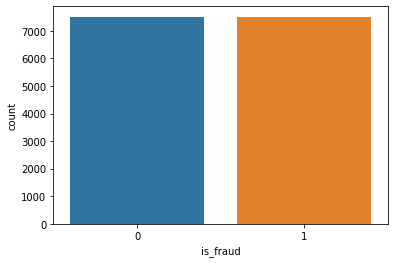

In [16]:
ax = sns.countplot(df["is_fraud"], label="Count")
S, D = df["is_fraud"].value_counts()
print("Count Fraud 0 : ", S)
print("Count Fraud 1 : ", D)

### Data Pre-Processing

In [17]:
df['gender'].replace({'F':1,'M':0},inplace=True)

In [18]:
df.dtypes

trans_date_trans_time     object
category                  object
amt                      float64
gender                     int64
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
job                       object
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [19]:
df

,trans_date_trans_time,category,amt,gender,city,state,zip,lat,long,job,merch_lat,merch_long,is_fraud
0,2019-01-02 01:06:37,grocery_pos,281.06,0,Collettsville,NC,28611,35.9946,-81.7266,Soil scientist,36.430124,-81.179483,1
1,2019-01-02 01:47:29,gas_transport,11.52,1,San Antonio,TX,78208,29.4400,-98.4590,Horticultural consultant,29.819364,-99.142791,1
2,2019-01-02 03:05:23,grocery_pos,276.31,1,San Antonio,TX,78208,29.4400,-98.4590,Horticultural consultant,29.273085,-98.836360,1
3,2019-01-02 03:38:03,gas_transport,7.03,0,Collettsville,NC,28611,35.9946,-81.7266,Soil scientist,35.909292,-82.091010,1
4,2019-01-02 03:55:47,grocery_pos,275.73,1,San Antonio,TX,78208,29.4400,-98.4590,Horticultural consultant,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,2020-03-25 13:22:53,kids_pets,49.57,1,Hooper,NE,68031,41.6414,-96.5232,"Engineer, automotive",41.116203,-96.088643,0
15008,2019-05-11 16:04:09,misc_pos,8.01,1,Hills,MN,56138,43.5335,-96.3645,Data scientist,44.139965,-96.496733,0
15009,2019-04-28 07:45:40,grocery_pos,115.71,1,Thompson,UT,84540,38.9999,-109.6150,"Surveyor, minerals",38.670339,-110.381641,0
15010,2020-01-16 00:49:51,shopping_net,4.89,1,Greenwood,IN,46143,39.5960,-86.1309,Financial adviser,39.282941,-86.655111,0


### Save MongoDB Database

In [20]:
import pymongo

In [21]:
# MongoDB Connection

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["fraud-detection"]
mycol = mydb["train-data"]

In [22]:
import json
records = json.loads(df.T.to_json()).values()
# mycol.insert(records)